In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 6]

In [37]:
def ImgHist(img:np.ndarray)->(np.ndarray):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    return hist

def CDF(hist:np.ndarray):
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    return cdf_normalized

def HistEqualize(img):
    hist = ImgHist(img)
    cdf = CDF(hist)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    res = cdf[img]
    return res

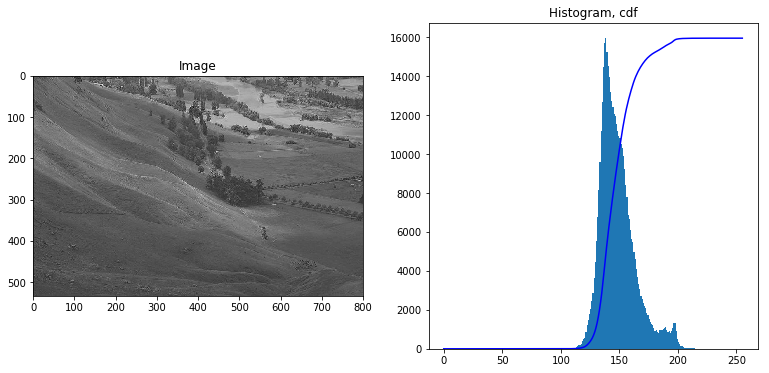

In [38]:
img = cv2.imread('images/hawkes_bay_in.jpg',0)
hist = ImgHist(img)
cdf_normalized = CDF(hist)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(img,'gray')
a.set_title('Image')
a = fig.add_subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.ravel(),256,[0,256]);
a.set_title('Histogram, cdf')
plt.show()

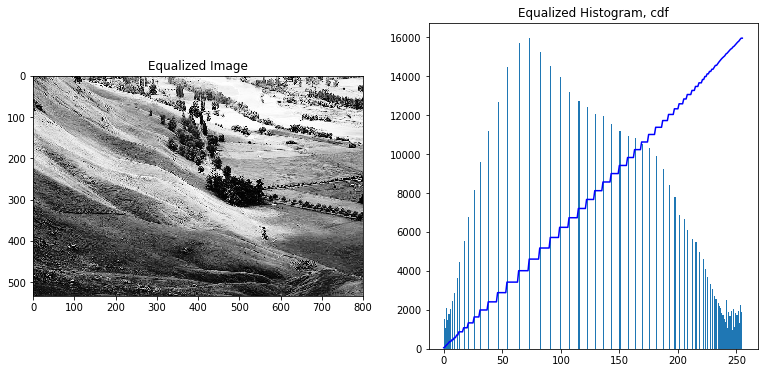

In [39]:
img = cv2.imread('images/hawkes_bay_in.jpg',0)
equalized = HistEqualize(img)
hist = ImgHist(equalized)
cdf_normalized = CDF(hist)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(equalized,'gray')
a.set_title('Equalized Image')
a = fig.add_subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized.ravel(),256,[0,256]);
a.set_title('Equalized Histogram, cdf')
plt.show()